## Data exploration Notebook and test environment.
This notebook is mainly to serve as a kind of testing environment to test functions before putting them into the main application. In this way, the main application doens't have to be run entirely just to see whethre the plot labels are correct for example.  

The initial part of the notebook is for data exploration, which is minimal in this case.

In [26]:
import pandas as pd

# Import the original, raw data and look at the features (columns)
df_raw = pd.read_csv('data/penguins_size.csv')
df_raw.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [27]:
# Choose which features will be kept to use for classification. 
df = df_raw[['species', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [28]:
# The initial cleaning of the data.
# Lazy method of removing the NaN rows
df = df.dropna()
df.isna().sum().sum()

# Separate train and target, ready for trainig.
X = df.iloc[:,1:]
Y = df.iloc[:,0]

# Save cleaned data.
df.to_csv("data/penguins_size_cleaned.csv")

In [29]:
# Training the model: A Random Forest Classifier.
# Here, we don't use hyperparameter optimization yet.

# split data into test-train (defaults to stratified splits)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Create model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

# Train the model
classifier.fit(X_train, Y_train)

# Make prediction
y_pred = classifier.predict(X_test)

# check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, y_pred)
print(score)

# save model
import pickle 
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

0.9710144927536232


In [30]:
# Make prediction manually
classifier.predict([[2,1,2,3]])

array(['Adelie'], dtype=object)

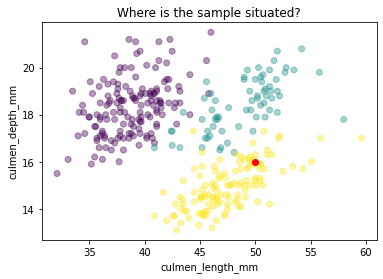

In [32]:
# This is a piece of code to visualise where a new sample is situated among the training data. This can serve as a sort of check on the predicted output of the model.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#pca = PCA(2)
#X_projected = pca.fit_transform(X)
new_sample = [50, 16, 230, 4750]


#x1 = X_projected[:, 0]
#x2 = X_projected[:, 1]

# Choose which features will be on the scatter axes.
x_label_1 = 0
x_label_2 = 1

# Get the names for the x and y label.
x_label = X.columns[x_label_1]
y_label = X.columns[x_label_2]

# Get the position of these features...
x_1 = X.iloc[:,x_label_1]
x_2 = X.iloc[:,x_label_2]

# ... to take the same ones in the new sample.
x_1_new = new_sample[x_label_1]
x_2_new = new_sample[x_label_2]

# Plot the scatter plot using Matplotlib.
fig = plt.figure()
#plt.scatter(x1, x2, c=pd.Categorical(Y).codes, alpha = 0.7)
plt.scatter(x_1, x_2, c=pd.Categorical(Y).codes, alpha = 0.4)
plt.scatter(x_1_new, x_2_new, c="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Where is the sample situated?")
plt.show()
